<a href="https://colab.research.google.com/github/JanhaviSoni7/Deep-Learning-Projects/blob/main/sampling_of_MNIST_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 56.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.90MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.7MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.78MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



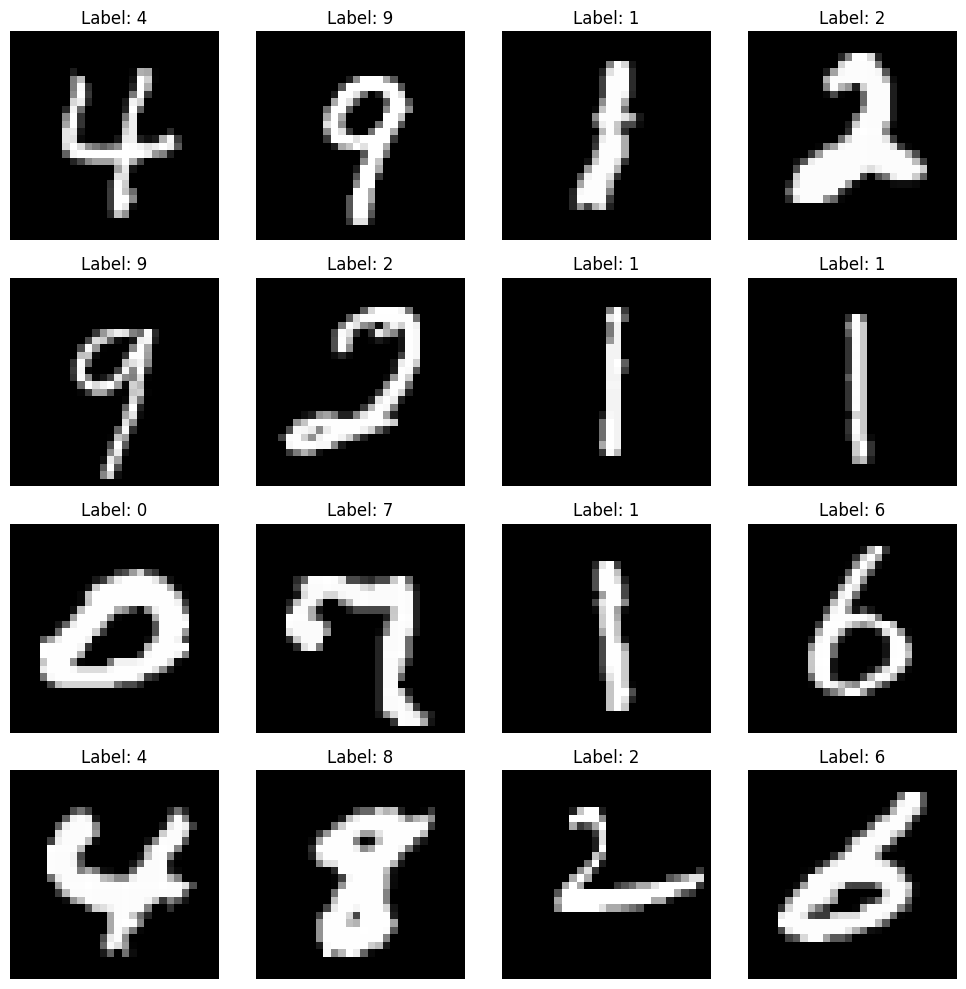

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import torch

# Load the MNIST dataset with tensor transformation
mnist = MNIST(root='./data', train=True, transform=ToTensor(), download=True)

# Compute class weights for handling class imbalance
targets = mnist.targets.numpy()
class_counts = np.bincount(targets)
class_weights = 1. / class_counts
sample_weights = class_weights[targets]

# Define a WeightedRandomSampler for balanced sampling
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Create a DataLoader with the sampler
loader = DataLoader(mnist, batch_size=64, sampler=sampler)

# Retrieve one batch of images and labels
images, labels = next(iter(loader))

# Plot the first 16 sampled images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("off")

plt.tight_layout()
plt.show()
